<a href="https://colab.research.google.com/github/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%207/NN_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cursos.virtual.uniandes.edu.co/isis4219/wp-content/uploads/sites/162/2014/11/cropped-misisheader.png" ><br>
# Machine Learning Techniques - ISIS4219

Intersemestral 2020




## Nombre de la red

¿Que es una red XXXX?

### **1. Razones para utilizar la red**



### **2. Aplicaciones de la red**

### **3. Arquitectura de la red**

La ESN busca resolver el problema de la convergencia lenta de los algoritmos de entrenamiento de las redes neuronales recurrentes. Son normalmente usadas con un modelo de tiempo discreto, es decir, las redes dinámicas son definidas por pasos de tiempos discretos t, y ellos están compuestos por entradas, una capa recurrente oculta (también conocida como *reservoir*) y una capa de salida. En la ilustración 1 se puede observar la arquitectura de una ESN, en ella normalmente solo se entrenan las conexiones representadas por las líneas discontinuadas, todas las demás conexiones se establecen al azar y permanecen fijas. 

<center>
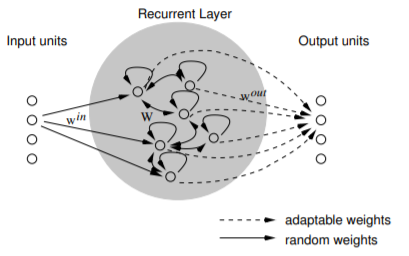<br/>
 Ilustración 1: Arquitectura de una echo state network
</center>

La capa recurrente, también conocida como *reservoir*, de forma análoga a un líquido, tiene propiedades de memoria de desvanecimiento. Se comporta como las ondulaciones producidas por una roca en un estanque, estas persisten durante un tiempo, por lo tanto, la información sobre el evento puede ser extraído del *reservoir* siempre y cuando no haya regresó a su estado de único atractor, es decir, a la superficie plana. La dinámica de la red se define como:

<center>
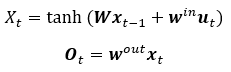
</center>

Donde se denotan las activaciones de las unidades en las capas individuales en el tiempo t por `ut`, `xt` y `ot` para las entradas, la capa oculta y la salida oculta, respectivamente. Se usan `w^in`, `W`, `w^out` como matrices de los respectivos pesos de conexión sináptica. Utilizando `f(x)=tanh⁡ x` como salida no linealidad para todas las unidades de capa oculta. 

Las principales diferencias de ESN con respecto a los enfoques tradicionales de redes recurrentes son la configuración de los pesos de conexión y el procedimiento de entrenamiento. Para construir un ESN, las unidades en la capa de entrada y la capa oculta están conectados al azar. Las conexiones entre la capa oculta y las unidades de salida son las únicas conexiones que se entrenan, generalmente con un enfoque de aprendizaje supervisado y fuera de línea que utiliza la regresión lineal. Sin embargo, para que el enfoque funcione con éxito, las conexiones en el depósito no pueden ser completamente aleatorias; Los *reservoirs* de ESN están típicamente diseñados para tener la propiedad de estado de eco (ESP). 

Para entrenar una ESN se siguen los siguientes pasos:

1. Proporcionar un RNN aleatorio: Debe crear un *reservoir* dinámico aleatorio RNN, utilizando cualquier modelo de neurona y el tamaño de él depende de la tarea. Luego, se debe adjuntar las unidades de entrada al *reservoir* creando conexiones aleatorias de todo a todos. Por último en este paso, se debe crear unidades de salida, si la tarea requiere retroalimentación de salida se instala conexiones de salida a depósito generadas aleatoriamente (todo a todo). Pero si la tarea no requiere retroalimentación, no se crea ninguna conexión.

2. Cosechar los estados del *reservoir*: Conduce el depósito dinámico con los datos de entrenamientore por tiempos 

3. Calcular los pesos de salida: Se calculan los pesos de salida como en regresión lineal, luego estos pesos se usan para crear conexiones de *reservoir*. Al terminar esto, el ESN esta listo para usarse. 

Referencia: Information Processing in Echo State Networks at the
Edge of Chaos (http://lizier.me/joseph/publications/2010-Boedecker-InfoProcessingEchoStateNets.pdf)




### **4. La red en Keras**

Keras no tiene una Echo State Network (ESN) implementada por defecto. Lo que sí se puede hacer es crear una celda personalizada para después utilizarla. A continuación se muestra una implementación encontrada en https://github.com/francesco-mannella/Echo-State-Networks/tree/master. Lo que hace es crear una celda personalizada y con ella construir las capas de una red neuronal recurrente (RNN). Al final, le agrega una última capa de salida densa que normalmente se le llama *readouts*. La implementación de la celda ESN la pueden encontrar en el siguiente link: https://github.com/francesco-mannella/Echo-State-Networks/blob/master/ESN.py

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.ops import math_ops
from ESN import EchoStateRNNCell
import matplotlib.pyplot as plt

# Init the ESN cell
cell = EchoStateRNNCell(units=num_units, 
                        activation=activation, 
                        decay=0.1, 
                        epsilon=1e-20,
                        alpha=0.5,
                        optimize=True,
                        optimize_vars=["rho", "decay", "alpha", "sw"],
                        seed=random_seed)

# Build the recurrent layer containing the ESN cell
recurrent_layer = keras.layers.RNN(cell, input_shape=(stime, num_inputs), 
                                   return_sequences=True, name="nn")
# Build the readout layer
output = keras.layers.Dense(num_outputs, name="readouts")
# initialize the adam optimizer for training
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# put all together in a keras sequential model
model = keras.models.Sequential()
model.add(recurrent_layer)
model.add(output)

In [ ]:
model.compile(loss="mse", optimizer=optimizer)
model.summary()

Hay un proyecto muy popular llamado pyESN (https://github.com/anvien/PyESN) que también nos podría servir como alternativa. Este es desarrollado en python, sin utilizar keras, tensorflow, o ninguna otra librería a parte de numpy y matplotlib. En el siguiente proyecto, se encuentra una implementación en la que se combina una versión modificada de pyESN y keras para formar la ESN completa: https://github.com/cknd/pyESN/pull/6/commits/55cb273591748665f33db5d5052bb31b08e95009. La manera que se usa es la siguiente:

In [ ]:
import unittest
import numpy as np
import keras

from pyESN import ESN

model = keras.models.Sequential()
model.add(keras.layers.Dense(units=200, activation='relu', input_dim=N+N_in))
model.add(keras.layers.Dense(units=N_out, activation='linear'))
model.compile(loss='mae', optimizer='adagrad')

esn = ESN(N_in, N_out, n_reservoir=N, keras_model=model)
esn.fit(self.X, self.y, epochs=20, verbose=0)
esn.predict(self.Xp)

### **5. Propiedades e hiperparametros**

Para el primer caso, los hiperparámetros para una ESN son los siguientes:

* units (int): Número de unidades de la celda RNN
* decay (float): Deterioro (decay) de la ODE de cada unidad. Default: 0.1.
* seed (int): Semilla para los números aleatorios. Default None.
* epsilon (float): Descuento al radio spectral de 1. Default: 1e-10.
* alpha (float): [0,1], la proporsión infinitesimal de expansión vs la rotación infinitesimal de un sistema dunámico definido por sus pesos internos
* sparseness (float): [0,1], Qué tan espacidos están los pesos de la matriz interna Default: 0.
* rho (float): Escala de los pesos internos
* sw (float): Escala de los pesos de entrada
* activation (callable): Función de activación a usar  Default: `tanh`.

Referencia: Tomado de https://github.com/francesco-mannella/Echo-State-Networks/blob/master/ESN.py#L39

Para el segundo caso, que utiliza pyESN, los hiperparámetros son los siguientes:

* n_inputs: Dimensión de entrada.
* n_outputs: Dimensión de salida.
* n_reservoir: Número de neuronas en el reservoir.
* spectral_radius: Radio espectral de la matriz de pesos recurrente.
* sparsity: Proporción de los pesos recurrentes con valos cero.
* noise: Ruido agregado a cada neurona (Regularización).
* input_shift: Escalar o vector del tamaño de n_inputs a agregar a cada dimensión antes de alimentar la red.
* input_scaling: Escalar o vector del tamaño de n_inputs a multiplicar con cada dimensión de entrada antes de alimentar la red.
* teacher_forcing: Si True, alimentar el target de vuelta a las unidades de salida.
* teacher_scaling: Factor aplicado a la señal de target.
* teacher_shift: Término aditivo aplicado a la señal target.
* keras_model: Entrenado para mapear la salida. input_size debe ser n_reservoir+1; output_size debe ser del mismo tamaño que n_outputs. Llamar `compile` en el modelo antes de pasarlo como parámetro.
* out_activation: Función de activación de la capa de salida.
* inverse_out_activation: Inversa de la función de la capa de salida.
* random_state: semilla.

Referencia: Tomado de https://github.com/cknd/pyESN/pull/6/commits/55cb273591748665f33db5d5052bb31b08e95009

### **6. Ejemplo practico - Demo**

Nota: para el desarrollo de este taller, tomar como referencia el siguiente ejemplo: [autoencoders](https://www.edureka.co/blog/autoencoders-tutorial/).